In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Whooper Swan

In [3]:
df = pd.read_csv('whooperSwan_USGS_ASC_argos.csv')
df.head()

,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,argos:altitude,argos:best-level,argos:calcul-freq,argos:error-radius,...,argos:valid-location-algorithm,argos:valid-location-manual,comments,manually-marked-outlier,manually-marked-valid,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,17748428819,True,2009-02-13 18:16:55.000,141.067,38.699,NaN,0.089,-133.0,401674757.3,NaN,...,2,NaN,alive,NaN,NaN,argos-doppler-shift,Cygnus cygnus,87878,s904_2009_IZU_87878,whooperSwan_USGS_ASC_argos
1,17748428824,True,2009-02-16 12:13:40.000,140.877,38.659,True,0.000,-123.0,401674680.5,NaN,...,1,NaN,alive,NaN,True,argos-doppler-shift,Cygnus cygnus,87878,s904_2009_IZU_87878,whooperSwan_USGS_ASC_argos
2,17748428827,True,2009-02-19 11:58:56.000,141.107,38.729,NaN,0.073,-117.0,401674688.2,NaN,...,1,NaN,alive,NaN,NaN,argos-doppler-shift,Cygnus cygnus,87878,s904_2009_IZU_87878,whooperSwan_USGS_ASC_argos
3,17748428828,True,2009-02-21 23:35:59.000,141.004,38.816,NaN,0.112,-124.0,401674843.8,NaN,...,1,NaN,alive,NaN,NaN,argos-doppler-shift,Cygnus cygnus,87878,s904_2009_IZU_87878,whooperSwan_USGS_ASC_argos
4,17748428831,True,2009-02-23 11:08:23.000,141.418,38.676,NaN,0.112,-124.0,401674843.8,NaN,...,1,NaN,alive,NaN,NaN,argos-doppler-shift,Cygnus cygnus,87878,s904_2009_IZU_87878,whooperSwan_USGS_ASC_argos


In [4]:
df["tag-local-identifier"].unique()

array([87878, 87879, 87880, 87881, 87882, 87883, 87884, 87885, 87886,
       87887, 87888, 87889, 87890, 87891, 87892, 87893, 87894],
      dtype=int64)

In [ ]:
# birb = df.groupby("tag-local-identifier")

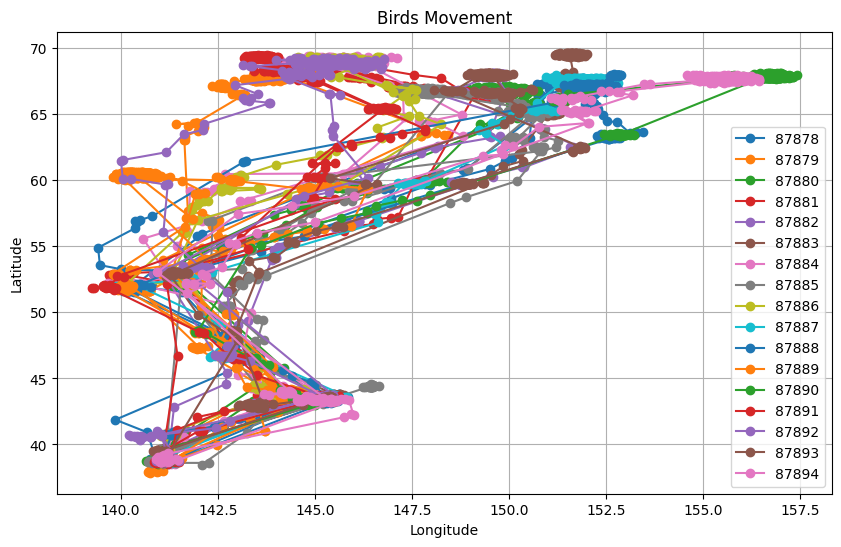

In [5]:
plt.figure(figsize=(10, 6))

# Iterate over unique bird IDs
for bird_id in df["tag-local-identifier"].unique():
    bird_df = df[df["tag-local-identifier"] == bird_id]
    plt.plot(bird_df['location-long'], bird_df['location-lat'], marker='o', label=bird_id)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Birds Movement')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
basic_network = nx.Graph()

for id in df['tag-local-identifier'].unique():
    id_df = df[df['tag-local-identifier'] == id]
    points = list(zip(id_df['location-long'], id_df['location-lat']))
    for i in range(len(points) - 1):
        basic_network.add_edge(points[i], points[i + 1])

In [ ]:
pos = nx.spring_layout(basic_network)
nx.draw(basic_network, pos, with_labels=True, node_size=100, node_color='skyblue')
plt.title('Undirected Graph of Point Pairs')
plt.show()

In [11]:
print(basic_network)

Graph with 23503 nodes and 24150 edges


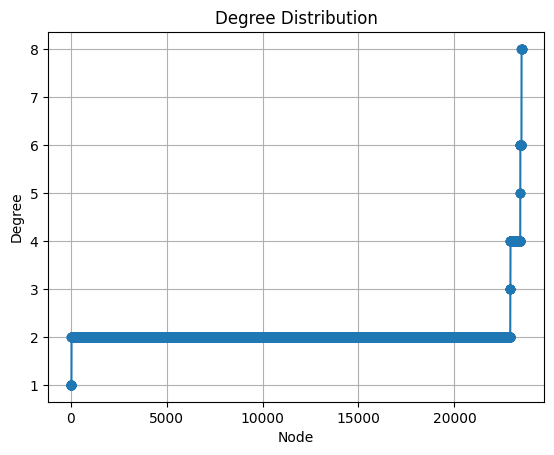

Nodes with degree not equal to 2:
39
1: [(141.067, 38.699), (151.736, 67.439), (141.091, 38.739), (140.929, 37.891), (141.154, 38.725), (143.588, 42.801), (141.055, 38.682), (145.64, 69.032), (141.143, 38.691), (144.848, 43.285), (149.469, 67.972), (141.293, 38.831), (141.192, 38.703), (151.6, 69.512), (151.623, 69.517), (141.302, 38.547), (144.365, 43.981), (141.15, 38.694), (147.68, 66.766), (146.454, 44.396), (141.178, 38.531), (144.066, 43.949), (141.028, 38.738), (152.169, 67.119), (141.185, 38.727), (141.318, 52.855), (141.125, 38.72), (142.889, 49.831), (141.145, 38.722), (151.142, 65.978), (141.112, 38.737), (145.257, 43.595), (141.167, 38.728), (141.336, 38.9), (141.124, 38.704), (149.53, 67.975), (141.108, 38.715), (141.037, 38.702), (141.113, 38.734)]
9
3: [(144.053, 67.767), (144.04, 67.763), (144.864, 43.368), (149.395, 67.955), (151.598, 69.516), (151.594, 69.514), (147.651, 66.764), (147.657, 66.762), (149.541, 67.97)]
512
4: [(151.78, 67.485), (152.063, 67.474), (151.82

In [16]:
degrees = dict(basic_network.degree())
degree_values = sorted(set(degrees.values()))

# Plot degree distribution as a line plot
plt.plot(sorted(degrees.values()), marker='o', linestyle='-')
plt.title('Degree Distribution')
plt.xlabel('Node')
plt.ylabel('Degree')
plt.grid(True)
plt.show()

# Get nodes with degrees not equal to 2
nodes_not_degree_2 = {degree: [node for node, deg in degrees.items() if deg == degree] for degree in degree_values if degree != 2}
print("Nodes with degree not equal to 2:")
for degree, nodes in nodes_not_degree_2.items():
    print(len(nodes))
    print(f"{degree}: {nodes}")

In [18]:
# Find total number of rows
total_rows = len(df)

# Find total number of unique pairs of (latitude, longitude)
unique_pairs = df[['location-lat', 'location-long']].drop_duplicates().shape[0]

print("Total number of rows:", total_rows)
print("Total number of unique pairs of (latitude, longitude):", unique_pairs)

Total number of rows: 24176
Total number of unique pairs of (latitude, longitude): 23503


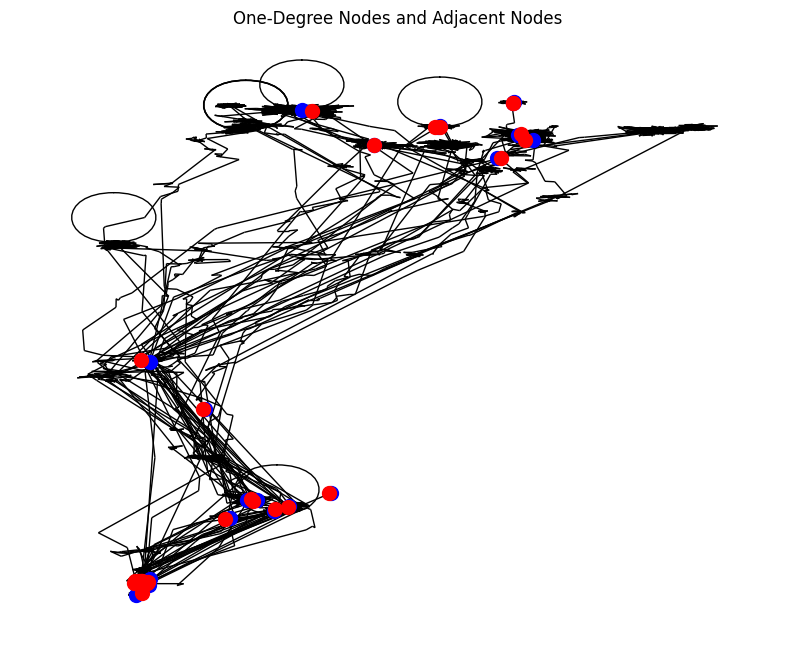

In [23]:
# Get positions for nodes
node_positions = {node: (x, y) for node, (x, y) in zip(basic_network.nodes(), basic_network.nodes())}

# Create lists of one-degree nodes and their adjacent nodes
one_degree_nodes = [node for node, degree in basic_network.degree() if degree == 1]
adjacent_nodes = [n for node in one_degree_nodes for n in basic_network.neighbors(node)]

# Plot the graph
plt.figure(figsize=(10, 8))

# Draw one-degree nodes
nx.draw_networkx_nodes(basic_network, pos=node_positions, nodelist=one_degree_nodes, node_size=100, node_color='blue')

# Draw adjacent nodes
nx.draw_networkx_nodes(basic_network, pos=node_positions, nodelist=adjacent_nodes, node_size=100, node_color='red')

# Draw edges
nx.draw_networkx_edges(basic_network, pos=node_positions)

# Draw labels
# nx.draw_networkx_labels(G, pos=node_positions, font_size=8)

# Show plot
plt.title('One-Degree Nodes and Adjacent Nodes')
plt.axis('off')
plt.show()

In [25]:
# Create a list of one-degree nodes
one_degree_nodes = [node for node, degree in basic_network.degree() if degree == 1]

# Create a list of one-degree nodes connected to one-degree nodes
one_degree_to_one_degree_nodes = [node for node in one_degree_nodes if all(basic_network.degree(n) == 1 for n in basic_network.neighbors(node))]

print(one_degree_nodes)
print(one_degree_to_one_degree_nodes)

[(141.067, 38.699), (151.736, 67.439), (141.091, 38.739), (140.929, 37.891), (141.154, 38.725), (143.588, 42.801), (141.055, 38.682), (145.64, 69.032), (141.143, 38.691), (144.848, 43.285), (149.469, 67.972), (141.293, 38.831), (141.192, 38.703), (151.6, 69.512), (151.623, 69.517), (141.302, 38.547), (144.365, 43.981), (141.15, 38.694), (147.68, 66.766), (146.454, 44.396), (141.178, 38.531), (144.066, 43.949), (141.028, 38.738), (152.169, 67.119), (141.185, 38.727), (141.318, 52.855), (141.125, 38.72), (142.889, 49.831), (141.145, 38.722), (151.142, 65.978), (141.112, 38.737), (145.257, 43.595), (141.167, 38.728), (141.336, 38.9), (141.124, 38.704), (149.53, 67.975), (141.108, 38.715), (141.037, 38.702), (141.113, 38.734)]
[]


In [27]:
# Find nodes with degree of 1
degree_1_nodes = [node for node, degree in dict(basic_network.degree()).items() if degree == 1]

# Find starting and ending points for each bird's path
starting_points = []
ending_points = []
for id in df['tag-local-identifier'].unique():
    id_df = df[df['tag-local-identifier'] == id]
    starting_points.append((id_df.iloc[0]['location-long'], id_df.iloc[0]['location-lat']))
    ending_points.append((id_df.iloc[-1]['location-long'], id_df.iloc[-1]['location-lat']))

# Find the intersection of sets
intersection_set = set(degree_1_nodes).intersection(starting_points + ending_points)

# Find nodes not in the intersection
non_intersection_nodes = [node for node in degree_1_nodes if node not in intersection_set]

print("Nodes not in the intersection of all 1-degree nodes and starting/ending points:")
print(non_intersection_nodes)

Nodes not in the intersection of all 1-degree nodes and starting/ending points:
[(144.848, 43.285), (149.469, 67.972), (151.6, 69.512), (147.68, 66.766), (149.53, 67.975)]


In [28]:
# List to store results
results = []

# Iterate over each bird's path
for bird_id in df['tag-local-identifier'].unique():
    bird_df = df[df['tag-local-identifier'] == bird_id]
    points = list(zip(bird_df['location-long'], bird_df['location-lat']))
    total_points = len(points)
    
    # Search for non-intersection nodes
    for i, point in enumerate(points):
        if point in non_intersection_nodes:
            results.append({
                'bird_id': bird_id,
                'total_points': total_points,
                'current_point': i + 1,
                'node': point
            })

# Display results
for result in results:
    print(result)

{'bird_id': 87882, 'total_points': 1777, 'current_point': 108, 'node': (144.848, 43.285)}
{'bird_id': 87882, 'total_points': 1777, 'current_point': 1266, 'node': (149.469, 67.972)}
{'bird_id': 87883, 'total_points': 1248, 'current_point': 1126, 'node': (151.6, 69.512)}
{'bird_id': 87885, 'total_points': 2582, 'current_point': 967, 'node': (147.68, 66.766)}
{'bird_id': 87893, 'total_points': 1532, 'current_point': 948, 'node': (149.53, 67.975)}


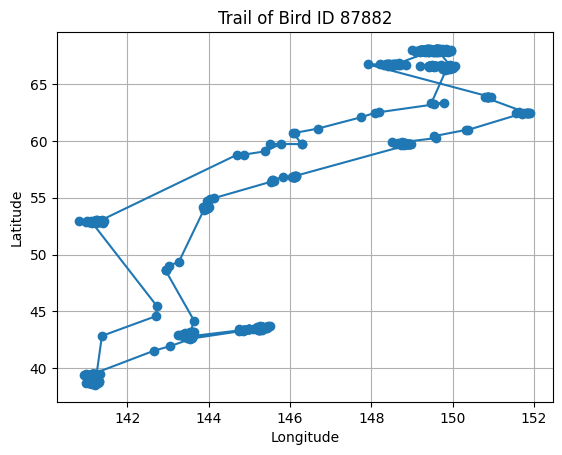

In [29]:
def draw_bird_trail(bird_id):
    # Filter DataFrame to extract data for the given bird ID
    bird_df = df[df['tag-local-identifier'] == bird_id]
    
    # Extract latitude and longitude coordinates
    latitudes = bird_df['location-lat'].tolist()
    longitudes = bird_df['location-long'].tolist()
    
    # Plot the trail
    plt.plot(longitudes, latitudes, marker='o', linestyle='-')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Trail of Bird ID {bird_id}')
    plt.grid(True)
    plt.show()

draw_bird_trail(87882)

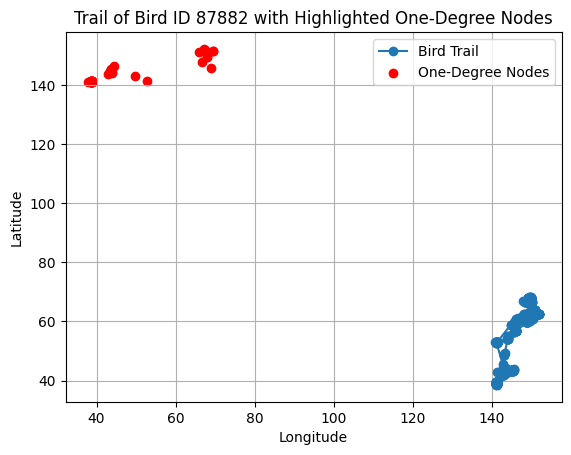

In [31]:
def draw_bird_trail_with_highlight(bird_id):
    # Filter DataFrame to extract data for the given bird ID
    bird_df = df[df['tag-local-identifier'] == bird_id]
    
    # Extract latitude and longitude coordinates
    latitudes = bird_df['location-lat'].tolist()
    longitudes = bird_df['location-long'].tolist()
    
    # Plot the trail
    plt.plot(longitudes, latitudes, marker='o', linestyle='-', label='Bird Trail')
    
    # Find one-degree nodes
    one_degree_nodes = [node for node, degree in dict(basic_network.degree()).items() if degree == 1]
    
    # Extract latitude and longitude coordinates of one-degree nodes
    one_degree_latitudes = [lat for lat, lon in one_degree_nodes]
    one_degree_longitudes = [lon for lat, lon in one_degree_nodes]
    
    # Highlight one-degree nodes
    plt.scatter(one_degree_longitudes, one_degree_latitudes, color='red', label='One-Degree Nodes')
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Trail of Bird ID {bird_id} with Highlighted One-Degree Nodes')
    plt.legend()
    plt.grid(True)
    plt.show()

draw_bird_trail_with_highlight(87882)

# Swainson's Hawk

In [3]:
data = pd.read_excel("swainson's hawk.xlsx")
data.head()

,species,birdID,date,longitude,latitude
0,Swainson's hawk,SW16,1996-10-08,-98.184,28.840
1,Swainson's hawk,SW16,1996-10-09,-98.877,29.120
2,Swainson's hawk,SW16,1996-10-10,-99.299,25.879
3,Swainson's hawk,SW16,1996-10-11,-98.326,22.770
4,Swainson's hawk,SW16,1996-10-12,-96.021,17.831
